In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Train.csv')

In [ ]:
labels = pd.read_csv('train_labels.csv')

In [ ]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
df

,Age,Vintage,Is_Active,P00,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,Customer_Category_S2,Customer_Category_S3,IsMale,City_Category_2
0,0.244882,-0.543603,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,0.837670,-0.543603,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,2.023244,-0.543603,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,-0.644298,-0.348524,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.841894,-0.446064,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,-1.039490,0.431790,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
37744,-0.249107,-0.836221,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1
37745,0.541276,0.626868,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
37746,1.726850,-0.446064,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
labels.drop(['P19','P21'],axis = 1 ,inplace = True)

In [ ]:
labels.drop(['Unnamed: 0'],axis = 1 ,inplace = True)

In [ ]:
labels.columns.shape

(20,)

## Now lets start building our models

* We will start with a basic model and build on from that



In [ ]:
df.columns.shape,labels.columns.shape

((29,), (20,))

In [ ]:
df.iloc[0].to_numpy()

array([ 0.24488249, -0.54360285,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ])

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation = 'relu',input_shape = (None,29)),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(20,activation = 'softmax')
])


# Lets Compile our model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = tf.keras.metrics.BinaryCrossentropy())

# LEts Fit our model
'''
We take the first 35K labels for training and the rest for validation
'''
model_1.fit(df[:30000],labels[:30000],epochs = 25)




Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


938/938 [==============================] - 4s 3ms/step - loss: 0.1838 - binary_crossentropy: 0.1838
Epoch 2/25
938/938 [==============================] - 4s 4ms/step - loss: 0.1519 - binary_crossentropy: 0.1519
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 0.1498 - binary_crossentropy: 0.1498
Epoch 4/25
938/938 [==============================] - 4s 5ms/step - loss: 0.1480 - binary_crossentropy: 0.1480
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 0.1476 - binary_crossentropy: 0.1476
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 0.1471 - binary_crossentropy: 0.1471
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 0.1466 - binary_crossentropy: 0.1466
Epoch 8/25
938/938 [==============================] - 3s 3ms/step - loss: 0.1461 - binary_crossentropy: 0.1461
Epoch 9/25
938/938 [==============================] - 2s 2ms/step - loss: 0.1458 - binary_crossentropy: 0.1458
Epoch 10/25


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 5)           150       
                                                                 
 dense_1 (Dense)             (None, None, 10)          60        
                                                                 
 dense_2 (Dense)             (None, None, 20)          220       
                                                                 
Total params: 430
Trainable params: 430
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining Classes

classes = np.array(['P00'	,'P1',	'P2',	'P3'	,'P4'	,'P5'	,'P6',	'P7'	,'P8',	'P9',	'P10'	,'P11'	,'P12'	,'P13'	,'P14'	,'P15'	,'P16'	,'P17',	'P18'	,'P20'])
classes = classes.reshape(1,20)

In [ ]:
classes

array([['P00', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
        'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
        'P20']], dtype='<U3')

##Lets Try Visualizing our predicitons to check how they are

In [ ]:
%matplotlib inline

In [ ]:
x = np.linspace(1,20,num = 20)

In [ ]:
x,x.shape

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]), (20,))

In [ ]:
'''
Lets write a function to visualize how are our predictions and how do they match up with the labels to identify which products to choose
'''


def visualize(i):
  plt.figure(figsize=(8,6))
  plt.plot(x,preds[i].reshape(20,))
  plt.plot(x,np.array(labels.iloc[i]).reshape(20,))
  plt.legend(['Prediction of Each Class','True Labels of each class 0(or)1 '])
  plt.xlabel('Each Class from 1-20')
  plt.ylabel('Prediction Probabilities')


In [ ]:
preds = np.array(model_1.predict(df[:100]))

##Lets now visualize some of our predictions to figure out how to assign labels for each probability

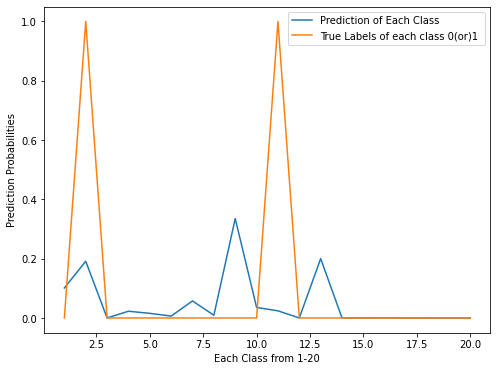

In [ ]:
visualize(25)

## Looks like we need to visualize the labels also so that it could lead us somewhere

In [ ]:
df[df.columns[4:25]].iloc[1]

P1     1
P2     1
P3     0
P4     0
P5     0
P6     0
P7     0
P8     0
P9     0
P10    0
P11    0
P12    0
P13    1
P14    0
P15    0
P16    0
P17    0
P18    0
P19    0
P20    1
P21    0
Name: 1, dtype: int64

In [ ]:
temp_labels = pd.read_csv('train_labels.csv')
temp_labels.drop(['Unnamed: 0'],axis = 1 ,inplace = True)

def label(i):
  # Lets plot the relation bw labels and products previously owned
  plt.figure(figsize = (8,6))
  plt.scatter(df.columns[4:26],np.array(temp_labels.iloc[i]))
  plt.scatter(df.columns[4:26],df[df.columns[4:26]].iloc[i])
  plt.legend(['Each Label','Each Product Previously Owned'])
  

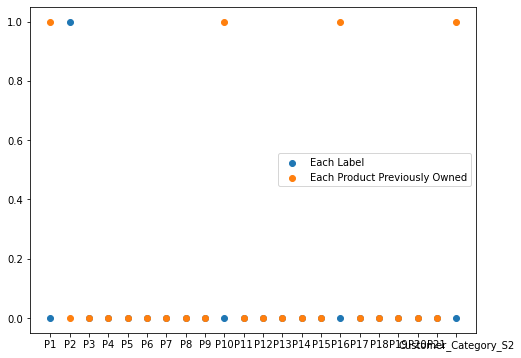

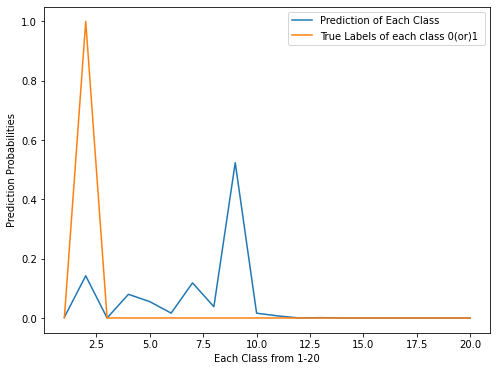

In [ ]:
label(24)
visualize(24)

## Function to convert the probabilities to 1s and zeros

In [ ]:
indices = np.argsort(y, axis=0)[-3:]
indices

array([5, 8, 6])

In [ ]:
preds = np.array(model_1.predict(df[:100]))

In [ ]:
preds.shape[0]

100

In [ ]:
def reconv(preds):
  prediction = preds.copy()
  indx = np.argsort(prediction,axis =0)[-3:]

  for i in indx:
    if prediction[i] >= 0.25:
      prediction[i] = 1
    else:
      prediction[i] = 0
  for i in range(0,len(prediction)):
    if i not in indx :
      prediction[i] = 0

  return prediction

In [ ]:
labelled_predictions = np.empty([1,20])
for i in range(0,preds.shape[0]):
  labelled_predictions = np.append(labelled_predictions,[reconv(preds[i])],axis  = 0)
labelled_predictions = np.delete(labelled_predictions,0,0)

In [ ]:
# labelled_predictions = np.delete(labelled_predictions,0,0)
labelled_predictions,labelled_predictions.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (100, 20))

In [ ]:
model_1.evaluate(df[:100],labels[:100])

4/4 [==============================] - 0s 6ms/step - loss: 0.1420 - binary_crossentropy: 0.1420


[0.14197072386741638, 0.14197072386741638]

### Lets evalutate al other metrics and visualize how our model performs

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(labels[:100],labelled_predictions)

0.06700000000000002

In [ ]:
model_1.save('model_1.h5')